**Project Submission by:**

**Username**: Dishant2001

**Name**: Dishant

**Email**: dishant.rathee@gmail.com

**LinkedIn**: www.linkedin.com/in/dishant-182b651a5

In [1]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, RepeatVector, TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth',200)

In [2]:
def read_text(filename):
  file=open(filename,mode='rt',encoding='utf-8')
  text=file.read()
  file.close()
  return text

In [3]:
def to_lines(text):
  sents=text.strip().split('\n')
  sents=[i.split('\t') for i in sents]
  return sents

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path='/content/drive/MyDrive/language_translate'

In [ ]:
data=read_text(path+'/deu.txt')
deu_eng=to_lines(data)
deu_eng=array(deu_eng)
deu_eng[:15]

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'Grüß Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ['Run!', 'Lauf!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #941078 (Fingerhut)'],
       ['Run.', 'Lauf!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #4008918 (JSakuragi) & #941078 (Fingerhut)'],
       ['Wow!', 'Potzdonner!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #2122382 (Pfirsichbaeumchen)'],
       ['Wow!', 'Donnerwetter!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #2122391 (Pfirsichbaeumchen)'],
       ['Duck!', 'Kopf runter!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #280158 (CM) & #9968521 (wolfgangth)'],
       

In [ ]:
deu_eng=deu_eng[:50000,:]
deu_eng[:15,:]

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'Grüß Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ['Run!', 'Lauf!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #941078 (Fingerhut)'],
       ['Run.', 'Lauf!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #4008918 (JSakuragi) & #941078 (Fingerhut)'],
       ['Wow!', 'Potzdonner!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #2122382 (Pfirsichbaeumchen)'],
       ['Wow!', 'Donnerwetter!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #2122391 (Pfirsichbaeumchen)'],
       ['Duck!', 'Kopf runter!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #280158 (CM) & #9968521 (wolfgangth)'],
       

In [ ]:
deu_eng.shape

(50000, 3)

In [ ]:
eng_1=[]
deu_1=[]

for i in deu_eng[:,0]:
  eng_1.append(len(i.split()))
for i in deu_eng[:,1]:
  deu_1.append(len(i.split()))

In [ ]:
length_df=pd.DataFrame({'eng':eng_1,'deu':deu_1})

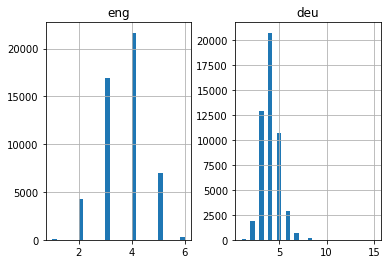

In [ ]:
length_df.hist(bins=30)
plt.show()

In [ ]:
def tokenization(lines):
  tokenizer=Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
eng_tokenizer=tokenization(deu_eng[:,0])
eng_vocab_size=len(eng_tokenizer.word_index)+1

eng_length=8
print('English Vocabulary Size: {}'.format(eng_vocab_size))

English Vocabulary Size: 6150


In [ ]:
deu_tokenizer=tokenization(deu_eng[:,1])
deu_vocab_size=len(deu_tokenizer.word_index)+1

deu_length=8
print('Deutch Vocabulary Size: {}'.format(deu_vocab_size))

Deutch Vocabulary Size: 10119


In [ ]:
def encode_sequences(tokenizer,length,lines):
  seq=tokenizer.texts_to_sequences(lines)
  seq=pad_sequences(seq,maxlen=length,padding='post')
  return seq

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(deu_eng,test_size=0.2,random_state=12)

In [ ]:
trainX=encode_sequences(deu_tokenizer,deu_length,train[:,1])
trainY=encode_sequences(eng_tokenizer,eng_length,train[:,0])

In [ ]:
testX=encode_sequences(deu_tokenizer,deu_length,test[:,1])
testY=encode_sequences(eng_tokenizer,eng_length,test[:,0])

In [ ]:
def build_model(in_vocab,out_vocab,in_timesteps,out_timesteps,units):
  model=Sequential()
  model.add(Embedding(in_vocab,units,input_length=in_timesteps,mask_zero=True))
  model.add(LSTM(units))
  model.add(RepeatVector(out_timesteps))
  model.add(LSTM(units,return_sequences=True))
  model.add(Dense(out_vocab,activation='softmax'))
  return model

In [ ]:
model=build_model(deu_vocab_size,eng_vocab_size,deu_length,eng_length,512)
# rms=optimizers.RMSprop(learning_rate=0.001)
rms=optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rms,loss='sparse_categorical_crossentropy')

In [ ]:
filename='model.h1.Dishant'
checkpoint= ModelCheckpoint(filename,monitor='val_loss',verbose=1,save_best_only=True,mode='min')

history=model.fit(trainX,trainY.reshape(trainY.shape[0],trainY.shape[1],1),
                  epochs=30, batch_size=512,
                  validation_split=0.2,callbacks=[checkpoint],verbose=1)

Epoch 1/30
63/63 [==============================] - 259s 4s/step - loss: 3.3506 - val_loss: 2.8524

Epoch 00001: val_loss improved from inf to 2.85237, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 2/30
63/63 [==============================] - 253s 4s/step - loss: 2.7035 - val_loss: 2.7184

Epoch 00002: val_loss improved from 2.85237 to 2.71840, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 3/30
63/63 [==============================] - 253s 4s/step - loss: 2.5442 - val_loss: 2.5074

Epoch 00003: val_loss improved from 2.71840 to 2.50743, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 4/30
63/63 [==============================] - 254s 4s/step - loss: 2.3716 - val_loss: 2.3781

Epoch 00004: val_loss improved from 2.50743 to 2.37814, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 5/30
63/63 [==============================] - 252s 4s/step - loss: 2.2123 - val_loss: 2.2587

Epoch 00005: val_loss improved from 2.37814 to 2.25871, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 6/30
63/63 [==============================] - 252s 4s/step - loss: 2.0644 - val_loss: 2.1509

Epoch 00006: val_loss improved from 2.25871 to 2.15085, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 7/30
63/63 [==============================] - 252s 4s/step - loss: 1.9419 - val_loss: 2.0588

Epoch 00007: val_loss improved from 2.15085 to 2.05878, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 8/30
63/63 [==============================] - 252s 4s/step - loss: 1.8328 - val_loss: 1.9897

Epoch 00008: val_loss improved from 2.05878 to 1.98972, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 9/30
63/63 [==============================] - 252s 4s/step - loss: 1.7274 - val_loss: 1.8993

Epoch 00009: val_loss improved from 1.98972 to 1.89931, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 10/30
63/63 [==============================] - 256s 4s/step - loss: 1.6286 - val_loss: 1.8501

Epoch 00010: val_loss improved from 1.89931 to 1.85010, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 11/30
63/63 [==============================] - 252s 4s/step - loss: 1.5318 - val_loss: 1.7608

Epoch 00011: val_loss improved from 1.85010 to 1.76081, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 12/30
63/63 [==============================] - 254s 4s/step - loss: 1.4395 - val_loss: 1.7002

Epoch 00012: val_loss improved from 1.76081 to 1.70016, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 13/30
63/63 [==============================] - 253s 4s/step - loss: 1.3503 - val_loss: 1.6492

Epoch 00013: val_loss improved from 1.70016 to 1.64920, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 14/30
63/63 [==============================] - 254s 4s/step - loss: 1.2628 - val_loss: 1.5949

Epoch 00014: val_loss improved from 1.64920 to 1.59489, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 15/30
63/63 [==============================] - 251s 4s/step - loss: 1.1849 - val_loss: 1.5941

Epoch 00015: val_loss improved from 1.59489 to 1.59411, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 16/30
63/63 [==============================] - 253s 4s/step - loss: 1.1077 - val_loss: 1.5192

Epoch 00016: val_loss improved from 1.59411 to 1.51916, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 17/30
63/63 [==============================] - 253s 4s/step - loss: 1.0348 - val_loss: 1.4703

Epoch 00017: val_loss improved from 1.51916 to 1.47027, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 18/30
63/63 [==============================] - 253s 4s/step - loss: 0.9649 - val_loss: 1.4463

Epoch 00018: val_loss improved from 1.47027 to 1.44629, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 19/30
63/63 [==============================] - 254s 4s/step - loss: 0.8989 - val_loss: 1.4076

Epoch 00019: val_loss improved from 1.44629 to 1.40759, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 20/30
63/63 [==============================] - 252s 4s/step - loss: 0.8363 - val_loss: 1.3885

Epoch 00020: val_loss improved from 1.40759 to 1.38847, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 21/30
63/63 [==============================] - 252s 4s/step - loss: 0.7748 - val_loss: 1.3587

Epoch 00021: val_loss improved from 1.38847 to 1.35874, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 22/30
63/63 [==============================] - 252s 4s/step - loss: 0.7182 - val_loss: 1.3459

Epoch 00022: val_loss improved from 1.35874 to 1.34592, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 23/30
63/63 [==============================] - 254s 4s/step - loss: 0.6652 - val_loss: 1.3339

Epoch 00023: val_loss improved from 1.34592 to 1.33392, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 24/30
63/63 [==============================] - 257s 4s/step - loss: 0.6130 - val_loss: 1.3107

Epoch 00024: val_loss improved from 1.33392 to 1.31069, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 25/30
63/63 [==============================] - 255s 4s/step - loss: 0.5657 - val_loss: 1.2929

Epoch 00025: val_loss improved from 1.31069 to 1.29290, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 26/30
63/63 [==============================] - 258s 4s/step - loss: 0.5188 - val_loss: 1.2737

Epoch 00026: val_loss improved from 1.29290 to 1.27368, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 27/30
63/63 [==============================] - 257s 4s/step - loss: 0.4767 - val_loss: 1.2682

Epoch 00027: val_loss improved from 1.27368 to 1.26822, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 28/30
63/63 [==============================] - 257s 4s/step - loss: 0.4374 - val_loss: 1.2615

Epoch 00028: val_loss improved from 1.26822 to 1.26155, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


Epoch 29/30
63/63 [==============================] - 257s 4s/step - loss: 0.4009 - val_loss: 1.2729

Epoch 00029: val_loss did not improve from 1.26155
Epoch 30/30
63/63 [==============================] - 255s 4s/step - loss: 0.3661 - val_loss: 1.2454

Epoch 00030: val_loss improved from 1.26155 to 1.24536, saving model to model.h1.Dishant


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


INFO:tensorflow:Assets written to: model.h1.Dishant/assets


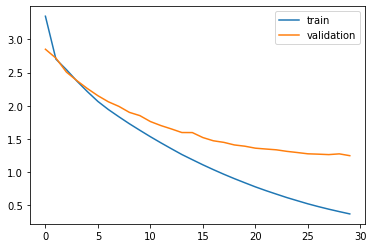

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
model.save(path+'/'+filename)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/language_translate/model.h1.Dishant/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/language_translate/model.h1.Dishant/assets


In [ ]:
model1=load_model(path+'/model.h1.Dishant')

In [ ]:
preds=model1.predict(testX.reshape((testX.shape[0],testX.shape[1])))
preds

array([[[1.75955385e-04, 7.28821469e-05, 9.20254570e-06, ...,
         2.26690333e-09, 2.67052980e-09, 2.64903499e-09],
        [4.77659996e-05, 5.21561924e-05, 2.59238732e-07, ...,
         2.97173258e-11, 2.37273604e-11, 2.51501528e-11],
        [8.81718763e-04, 1.48067693e-06, 1.72907221e-06, ...,
         4.23485993e-08, 4.45967352e-08, 4.01344025e-08],
        ...,
        [9.99999762e-01, 4.27237468e-10, 2.75091810e-10, ...,
         2.32162016e-16, 2.64669500e-16, 2.50826943e-16],
        [9.99999881e-01, 2.45984760e-10, 2.24416374e-10, ...,
         7.08851499e-17, 7.63780660e-17, 7.28323794e-17],
        [1.00000000e+00, 9.00148636e-11, 6.86338694e-11, ...,
         1.37118148e-17, 1.41362321e-17, 1.51874414e-17]],

       [[7.73964217e-04, 1.93933033e-07, 2.20195872e-07, ...,
         2.01286721e-08, 2.16969305e-08, 2.74761351e-08],
        [1.09612313e-03, 2.27417167e-05, 4.21429931e-08, ...,
         1.08903431e-09, 1.07464415e-09, 1.13325282e-09],
        [4.38924097e-02, 

In [ ]:
preds.shape

(10000, 8, 6150)

In [ ]:
preds[0][0].shape

(6150,)

In [ ]:
argmax(preds[0][0])

117

In [ ]:
for word, i in eng_tokenizer.word_index.items():
  if i==117:
    print(word)
    break

what's


In [ ]:
preds[0].shape

(8, 6150)

In [ ]:
def get_word(n,tokenizer):
  for word,index in tokenizer.word_index.items():
    if index==n:
      return word
  return ''

In [ ]:
preds_text=[]
for i in preds:
  temp=[]
  for k in i:
    # print(len(k))
    j=argmax(k)
    t=get_word(j,eng_tokenizer)
    print(t)
    temp.append(t)
  preds_text.append(' '.join(temp))

Streaming output truncated to the last 5000 lines.
i
have
a
list




we
haven't
eaten
yet




tom
ate






tom
isn't
a
mere




tom
isn't
a
miner




the
cold
was





he
wants
vengeance





i'll
go
go





i
did
you
a
present



i
expect
you
you




i
didn't
hear
you




she's
not
my
type




he
was
wrong





i
like
music





isn't
tom
with
you




it's
very
beautiful





they're
invited
you





i
like
rock





tom
likes
money





i
hope
you
win




i
an
short
breath




i
felt
isolated





that
wasn't
a
funny




tom
looked
agreed





you're
amazing






stay
down






come
out
time
time




tom
seemed
to





tom
is
dying





you're
the
my
woman




i
read
a
letter




no
it
for





she
lost






i
miss
you
you




it
can
happen





eat
your
vegetables





i
wasn't
scared





the
clock
is
immortal




speak
slowly






can
you
deliver
that




you
know
know
me




tom
took
a
a




we're
just
friends





have
what
you
want




tom
was
inside





how
are
you
you



In [ ]:
preds_text[999]

'can you hear trusted    '

In [ ]:
pred_df=pd.DataFrame({'Deutch':test[:,1],'actual':test[:,0],'predicted':preds_text})

In [ ]:
pd.set_option('display.max_colwidth',200)

In [ ]:
pred_df.head(50)

,Deutch,actual,predicted
0,Wie lautet die Telefonnummer?,What is the number?,what's the number
1,Probier sie an!,Try it on.,try it on
2,Wir haben uns geirrt.,We were wrong.,we were wrong
3,Das stimmt nicht.,That's untrue.,this not right
4,Fassen Sie nichts an!,Don't touch anything.,don't touch anything
5,Tom ruft zurück.,Tom is calling back.,tom leave back
6,"Ich glaube, Tom ist wach.",I think Tom is awake.,i think tom is
7,Was darf es sein?,What are you having?,what can be
8,Ich mag diese Flagge.,I like that flag.,i like this flag
9,Du hast eine gute Arbeit.,You have a good job.,you have a good job


In [ ]:
pred_df.to_csv(path+'/predictions.csv')

In [9]:
 test_df=pd.read_csv(path+'/predictions.csv')
 test_df.tail(50)

,Unnamed: 0,Deutch,actual,predicted
9950,9950,Geh zurück auf deinen Platz.,Go back to your seat.,go back your your
9951,9951,Warum sollte er lügen?,Why would he lie?,why would tom lie
9952,9952,Hör auf zu klatschen.,Stop clapping.,stop fighting
9953,9953,Ich habe das geschrieben.,I wrote that.,i wrote this
9954,9954,Bitte komm her.,Please come here.,please come here
9955,9955,Das kannst du dir abschminken.,Forget about it.,you can afford it
9956,9956,Tom wurde Zahnarzt.,Tom became a dentist.,tom got sunburned
9957,9957,Wir sind hier alleine.,We're alone here.,we're here alone
9958,9958,Unsere Verbündeten sind schwach.,Our allies are weak.,the boys are dead
9959,9959,Tom wurde bei lebendigem Leibe begraben.,Tom was buried alive.,tom was daydreaming
